In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [2]:
# 단어 수 기준(TF) 벡터화
vectorizer = CountVectorizer(min_df = 1, ngram_range = (1,1))

In [3]:
# 코퍼스 구축
corpus = ['홍브라더스 텍스트마이닝 정말 정말 재미있어요.',
          '저도 홍브라더스 텍스트마이닝 재미있는 것 같아요.',
          '저는 얼른 밥 먹으러 가고 싶어요.',
          '저는 집에 가고 싶어요.']

In [4]:
# feature(여기에서는 단어 기준) 추출
features = vectorizer.fit_transform(corpus)
print(features)
# sparse array

  (0, 6)	1
  (0, 9)	2
  (0, 11)	1
  (0, 12)	1
  (1, 1)	1
  (1, 5)	1
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (2, 3)	1
  (2, 0)	1
  (2, 2)	1
  (2, 4)	1
  (2, 7)	1
  (3, 10)	1
  (3, 3)	1
  (3, 0)	1
  (3, 7)	1


In [5]:
# dense array로 변환
features.todense()

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1],
        [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
        [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [6]:
# DTM(Document Term Matrix) 만들기
dtm_np = np.array(features.todense())
print(dtm_np)

[[0 0 0 0 0 0 1 0 0 2 0 1 1]
 [0 1 0 0 0 1 0 0 1 0 0 1 1]
 [1 0 1 1 1 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 1 0 0 1 0 0]]


In [7]:
# feature 이름 불러오기
feature_names = vectorizer.get_feature_names()
print(feature_names)

['가고', '같아요', '먹으러', '싶어요', '얼른', '재미있는', '재미있어요', '저는', '저도', '정말', '집에', '텍스트마이닝', '홍브라더스']


In [8]:
# DataFrame 생성
pd.DataFrame(data = dtm_np, columns = feature_names)

,가고,같아요,먹으러,싶어요,얼른,재미있는,재미있어요,저는,저도,정말,집에,텍스트마이닝,홍브라더스
0,0,0,0,0,0,0,1,0,0,2,0,1,1
1,0,1,0,0,0,1,0,0,1,0,0,1,1
2,1,0,1,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,1,0,0


In [9]:
# 유클리다안 유사도 구하기
print(np.linalg.norm(dtm_np[1]-dtm_np[0]))
print(np.linalg.norm(dtm_np[2]-dtm_np[0]))

2.8284271247461903
3.4641016151377544


In [10]:
# 모든 유클리디안 거리 유사도 구하기
euclidian_distance_similarity = []
for k in range(4):
    for i in range(4):
        euclidian_distance = np.linalg.norm(dtm_np[k]-dtm_np[i])
        euclidian_distance_similarity.append(euclidian_distance)
        print(k, i, ">>", euclidian_distance)

0 0 >> 0.0
0 1 >> 2.8284271247461903
0 2 >> 3.4641016151377544
0 3 >> 3.3166247903554
1 0 >> 2.8284271247461903
1 1 >> 0.0
1 2 >> 3.1622776601683795
1 3 >> 3.0
2 0 >> 3.4641016151377544
2 1 >> 3.1622776601683795
2 2 >> 0.0
2 3 >> 1.7320508075688772
3 0 >> 3.3166247903554
3 1 >> 3.0
3 2 >> 1.7320508075688772
3 3 >> 0.0


In [11]:
# 유클리디안 거리 유사도 4X4 행렬로 변환
ud_np = np.array(euclidian_distance_similarity); ud_np
ud_np.reshape([4,4])

array([[0.        , 2.82842712, 3.46410162, 3.31662479],
       [2.82842712, 0.        , 3.16227766, 3.        ],
       [3.46410162, 3.16227766, 0.        , 1.73205081],
       [3.31662479, 3.        , 1.73205081, 0.        ]])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

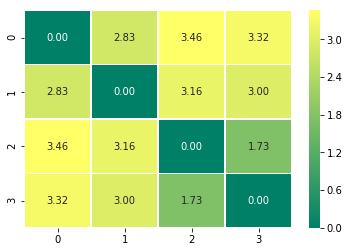

In [14]:
# 히트맵 시각화
# sns.set(rc={'figure.figsize':(10,10)}) 사진 크기
sns.heatmap(data = ud_np.reshape([4,4]),annot = True, fmt = '.2f', linewidths=.5, cmap = 'summer')

In [15]:
# 모든 코사인 유사도 구하기
cosine_similarity = []
for k in range(4):
    for i in range(4):
        cosine = np.dot(dtm_np[k],dtm_np[i])/(np.linalg.norm(dtm_np[k])*np.linalg.norm(dtm_np[i]))
        cosine_similarity.append(cosine)
        print(k, i, ">>",cosine)

0 0 >> 0.9999999999999999
0 1 >> 0.33806170189140655
0 2 >> 0.0
0 3 >> 0.0
1 0 >> 0.33806170189140655
1 1 >> 0.9999999999999998
1 2 >> 0.0
1 3 >> 0.0
2 0 >> 0.0
2 1 >> 0.0
2 2 >> 0.9999999999999998
2 3 >> 0.6708203932499369
3 0 >> 0.0
3 1 >> 0.0
3 2 >> 0.6708203932499369
3 3 >> 1.0


In [16]:
# 코사인 유사도 4X4 행렬 구하기
cs_np = np.array(cosine_similarity)
cs_np.reshape(4,4)

array([[1.        , 0.3380617 , 0.        , 0.        ],
       [0.3380617 , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.67082039],
       [0.        , 0.        , 0.67082039, 1.        ]])

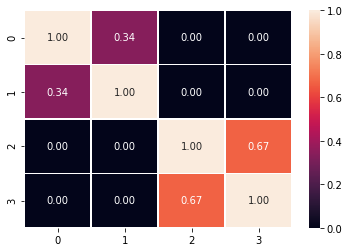

In [17]:
# 히트맵 시각화
sns.heatmap(data = cs_np.reshape(4,4), annot = True, fmt = '.2f', linewidths=.5)

In [18]:
# TFIDF 벡터화
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
features = vectorizer.fit_transform(corpus)

In [19]:
# feature 이름 불러 오기
feature_names = vectorizer.get_feature_names()

In [20]:
# dense array로 변환
features.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.40021825, 0.        , 0.        , 0.8004365 ,
         0.        , 0.31553666, 0.31553666],
        [0.        , 0.48546061, 0.        , 0.        , 0.        ,
         0.48546061, 0.        , 0.        , 0.48546061, 0.        ,
         0.        , 0.38274272, 0.38274272],
        [0.40104275, 0.        , 0.50867187, 0.40104275, 0.50867187,
         0.        , 0.        , 0.40104275, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.46580855, 0.        , 0.        , 0.46580855, 0.        ,
         0.        , 0.        , 0.46580855, 0.        , 0.        ,
         0.59081908, 0.        , 0.        ]])

In [21]:
# DTM 생성
dtm_np = np.array(features.todense())

In [22]:
# DataFrame 생성
pd.DataFrame(data = dtm_np, columns = feature_names)

,가고,같아요,먹으러,싶어요,얼른,재미있는,재미있어요,저는,저도,정말,집에,텍스트마이닝,홍브라더스
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400218,0.000000,0.000000,0.800436,0.000000,0.315537,0.315537
1,0.000000,0.485461,0.000000,0.000000,0.000000,0.485461,0.000000,0.000000,0.485461,0.000000,0.000000,0.382743,0.382743
2,0.401043,0.000000,0.508672,0.401043,0.508672,0.000000,0.000000,0.401043,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.465809,0.000000,0.000000,0.465809,0.000000,0.000000,0.000000,0.465809,0.000000,0.000000,0.590819,0.000000,0.000000


In [23]:
# 모든 유클리디안 거리 유사도 구하기
euclidian_distance_similarity = []
for k in range(4):
    for i in range(4):
        euclidian_distance = np.linalg.norm(dtm_np[k]-dtm_np[i])
        euclidian_distance_similarity.append(euclidian_distance)
        print(k, i, ">>", euclidian_distance)

0 0 >> 0.0
0 1 >> 1.2316340990185821
0 2 >> 1.414213562373095
0 3 >> 1.4142135623730951
1 0 >> 1.2316340990185821
1 1 >> 0.0
1 2 >> 1.414213562373095
1 3 >> 1.4142135623730951
2 0 >> 1.414213562373095
2 1 >> 1.414213562373095
2 2 >> 0.0
2 3 >> 0.9376274101106029
3 0 >> 1.4142135623730951
3 1 >> 1.4142135623730951
3 2 >> 0.9376274101106029
3 3 >> 0.0


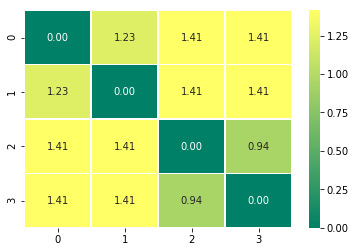

In [24]:
# 히트맵 시각화
ud_np = np.array(euclidian_distance_similarity)
ud_np.reshape([4,4])
sns.heatmap(data = ud_np.reshape([4,4]),annot = True, fmt = '.2f', linewidths=.5, cmap = 'summer')

In [25]:
# 코사인 유사도 구하기
print(np.dot(dtm_np[0],dtm_np[1])/(np.linalg.norm(dtm_np[0])*np.linalg.norm(dtm_np[1])))

0.24153872306734275


In [26]:
# 모든 코사인 유사도 구하기
cosine_similarity = []
for k in range(4):
    for i in range(4):
        cosine = np.dot(dtm_np[k],dtm_np[i])/(np.linalg.norm(dtm_np[k])*np.linalg.norm(dtm_np[i]))
        cosine_similarity.append(cosine)
        print(k, i, ">>",cosine)

0 0 >> 1.0000000000000002
0 1 >> 0.24153872306734275
0 2 >> 0.0
0 3 >> 0.0
1 0 >> 0.24153872306734275
1 1 >> 1.0
1 2 >> 0.0
1 3 >> 0.0
2 0 >> 0.0
2 1 >> 0.0
2 2 >> 1.0
2 3 >> 0.5604274199046415
3 0 >> 0.0
3 1 >> 0.0
3 2 >> 0.5604274199046415
3 3 >> 1.0000000000000002


In [27]:
# 코사인 유사도 4X4 행렬 구하기
cs_np = np.array(cosine_similarity)
cs_np.reshape(4,4)

array([[1.        , 0.24153872, 0.        , 0.        ],
       [0.24153872, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.56042742],
       [0.        , 0.        , 0.56042742, 1.        ]])

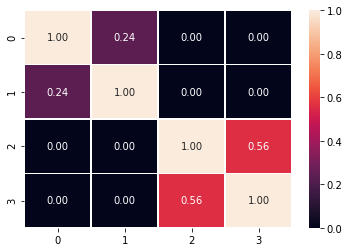

In [28]:
# 히트맵 시각화
sns.heatmap(data = cs_np.reshape(4,4), annot = True, fmt = '.2f', linewidths=.5)